In [1]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2023-06-05 13:21:44.552340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 13:21:44.565808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 13:21:44.567522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 13:21:44.569920: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
model = Sequential()
model.add(base_model)

In [5]:
num_classes = 5
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # rescale pixel values between 0 and 1
train_dir = "./dataset/VegetableImages/train/"
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_dir = "./dataset/VegetableImages/validation/"
validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4000 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
with tf.device('/GPU:0'):
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // 32,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // 32,
        epochs=200
    )

Epoch 1/200


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


125/125 [==============================] - 74s 589ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.5444 - val_accuracy: 0.9167
Epoch 2/200
125/125 [==============================] - 74s 588ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1756 - val_accuracy: 0.9792
Epoch 3/200
125/125 [==============================] - 74s 589ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.3640 - val_accuracy: 0.9583
Epoch 4/200
125/125 [==============================] - 74s 589ms/step - loss: 0.0372 - accuracy: 0.9962 - val_loss: 2.7557 - val_accuracy: 0.9740
Epoch 5/200
125/125 [==============================] - 74s 588ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.1309 - val_accuracy: 0.9844
Epoch 6/200
125/125 [==============================] - 74s 588ms/step - loss: 0.0491 - accuracy: 0.9983 - val_loss: 0.1908 - val_accuracy: 0.9792
Epoch 7/200
125/125 [==============================] - 74s 588ms/step - loss: 4.0023e-04 - accuracy: 1.0000 - val_loss: 0.3320 - val_acc

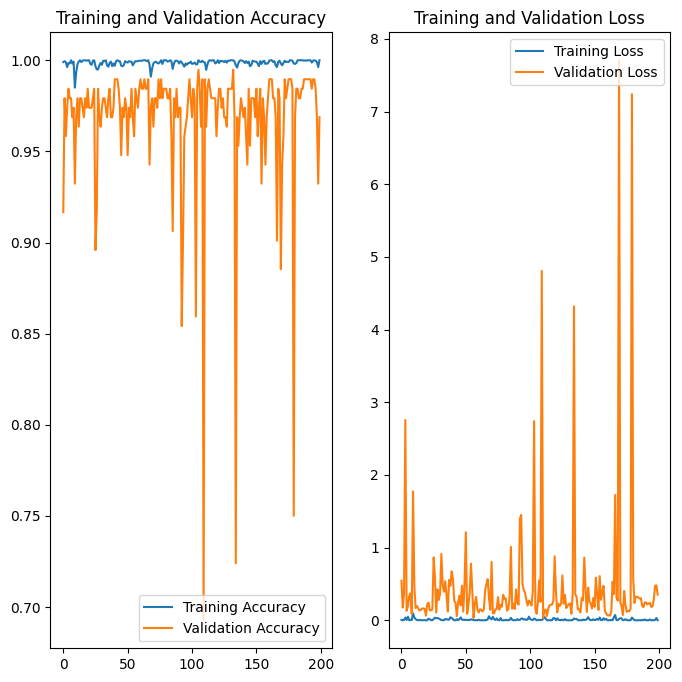

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [3]:
from keras.preprocessing.image import ImageDataGenerator
test_ds = "./dataset/VegetableImages/test/"
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values between 0 and 1

test_generator = test_datagen.flow_from_directory(
    test_ds,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 994 images belonging to 5 classes.


In [24]:
model.save("./model/veggies-resnet-model-v1/")

2023-06-05 22:23:41.700031: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/veggies-resnet-model-v1/assets


In [1]:
from keras.models import load_model

loaded_model = load_model("./model/veggies-resnet-model-v1/")

2023-06-05 22:28:13.629699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 22:28:13.642698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 22:28:13.644465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-05 22:28:13.647052: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
predictions = loaded_model.predict_generator(test_generator, steps=test_generator.samples)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
2023-06-05 22:30:38.565966: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


In [6]:
import numpy as np

# Convert the predicted labels to class indices
predicted_labels = np.argmax(predictions, axis=1)


In [7]:
from sklearn.metrics import classification_report

# Get the true labels for the test images
true_labels = test_generator.classes


# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print the classification report
print(report)

              precision    recall  f1-score   support

        Bean       0.98      1.00      0.99       200
      Papaya       0.97      1.00      0.98       200
      Potato       0.99      1.00      0.99       200
      Radish       0.99      0.98      0.99       194
      Tomato       0.99      0.93      0.96       200

    accuracy                           0.98       994
   macro avg       0.98      0.98      0.98       994
weighted avg       0.98      0.98      0.98       994

